In [1]:
!pip install keras_core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 3.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import os
import time
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

os.environ["KERAS_BACKEND"] = "torch"
import keras

# The Perceptron and beyond

In this section, we consider a regression task where the underlying data generation process is as follows:
$$ y = - \sin{(0.8 * x)}$$

Note that in this example there is no noise in the data, a case that you will rarely encounter in practice.

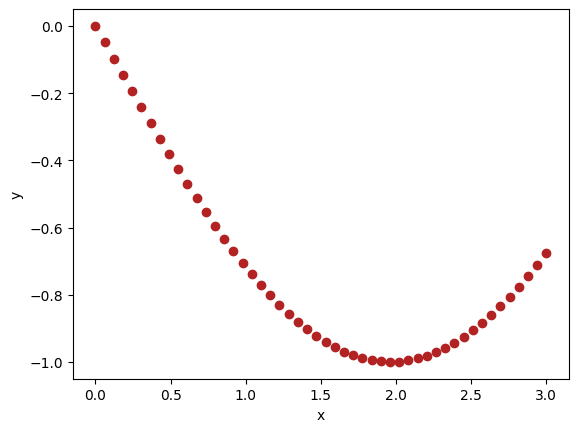

In [3]:
# Defining our dataset

x_train = np.linspace(0, 3, 50)
y_train = - np.sin(0.8*x_train)

# Plotting the dataset

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color= "firebrick")
plt.show()

The following function can be used to instantiate the perceptron

In [4]:
def perceptron(input_shape= [1], units= 1, activation= None):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation)
        ]
    )
    return model

linear_model = perceptron()

# You can vizualize a summary of your model by commenting out the following line.
# Here it is an affine function in dimension 1, thus having two parameters.

# linear_model.summary()

To fit a model in keras, one must first compile it, that is specify the loss and optimizer. Here they are respectively chosen as the mean squared error and gradient descent. Observe that the batch size is the same as the size of the training dataset, resulting in batch gradient descent.

You can play with the learning rate and number of epochs to understand how the training algorithm behaves.

Epoch 1/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 4.9524
Epoch 2/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5294
Epoch 3/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5483
Epoch 4/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2576
Epoch 5/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1636
Epoch 6/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1268
Epoch 7/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1077
Epoch 8/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0951
Epoch 9/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0853
Epoch 10/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0773
Epoch 11/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0707
Epoch 12/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0651
Epoch 13/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0604
Epoch 14/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0565
Epoch 15/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0531
Epoch 16/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

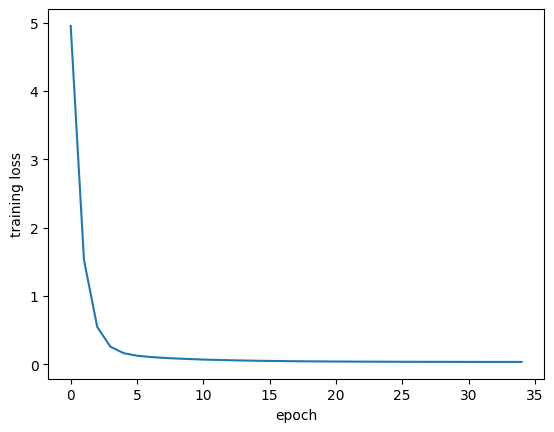

In [5]:
linear_model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.SGD(learning_rate= 0.2)
)
history = linear_model.fit(x_train, y_train, epochs= 35, batch_size= 50)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history.history['loss'])
plt.show()

Having trained the model, we can now use it in prediction.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


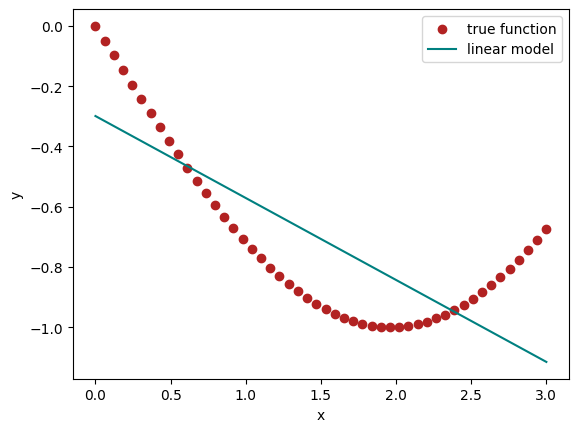

In [6]:
y_pred_linear = linear_model.predict(x_train)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color='firebrick', label= 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label= 'linear model')
plt.legend()
plt.show()

Beyond this simple perceptron, we now consider a 2-layers neural network model.

In [7]:
def neural_net_2layers(input_shape= [1], units= 16, activation= 'sigmoid'):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation),
            keras.layers.Dense(units= 1)
        ]
    )
    return model

You can train the model, and play with the hyperparameters to answer the questions.

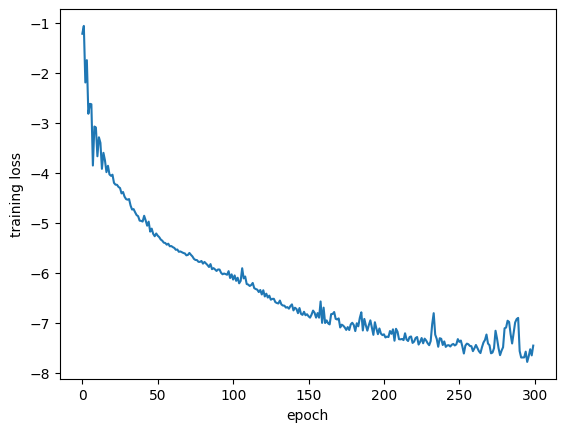

In [8]:
net = neural_net_2layers(units= 10)

net.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate= 0.1)  # Try also the (batch) SGD optimizer
)

history = net.fit(x_train, y_train, epochs= 300, batch_size= 25, verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(np.log(history.history['loss']))
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


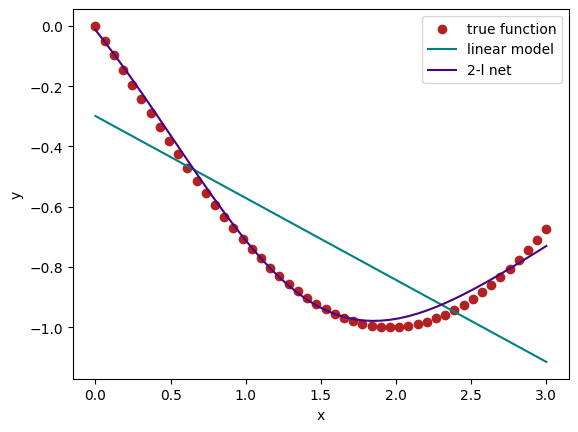

In [9]:
y_pred_2l = net.predict(x_train)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color='firebrick', label = 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label = 'linear model')
plt.plot(x_train, y_pred_2l, color= 'indigo', label = '2-l net')
plt.legend()
plt.show()

# In the wild jungle of training algorithms

## Small model

We first start by defining a simple dataset based on a modified cosine surface. This will allows us to test small models, and in particular 2nd order optimization algorithms. While <tt>keras</tt> is high-level deep learning library, we will dive into the depths of <tt>pytorch</tt> to have more control over the optimization schemes.

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


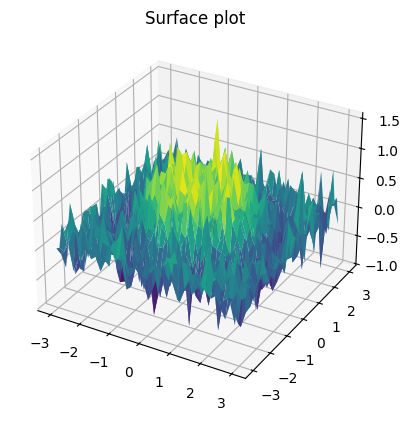

In [4]:
def f(x, y):
    return(torch.sin(0.8*(x**2 + y**2)) / (x**2 + y**2)**(0.9))

noise_level = 0.25
mesh_size = 40
t = torch.linspace(-3, 3, mesh_size)
x, y = torch.meshgrid(t, t)
z = f(x, y)
z_noisy = z + noise_level * torch.randn(mesh_size, mesh_size)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z_noisy,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()


# dataset creation
x_train = torch.vstack([x.ravel(), y.ravel()]).T
y_train = z_noisy.ravel()
y_test = z.ravel()

The following class encodes the architecture of a neural network with two hidden layers, for when the input data is 2-dimensional. We provide a simplified <tt>fit</tt> method to train the neural network. You are encouraged to understand the code, and what executing the functions will return so as to draw legitimate conclusions about the experiments.

In [5]:
class Net3L(nn.Module):

    def __init__(self, n_neurons_l1= 10, n_neurons_l2= 10):
        super(Net3L, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, n_neurons_l1),
            nn.ReLU(),
            nn.Linear(n_neurons_l1, n_neurons_l2),
            nn.ReLU(),
            nn.Linear(n_neurons_l2, 1)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

    def fit(self, x_train, y_train, optimizer, batch_size, n_epochs_max):
        # Instantiate the train loader
        train_data = TensorDataset(x_train, y_train)
        train_loader = DataLoader(dataset =train_data, batch_size= batch_size, shuffle= True)
        # Beginning the optimization algorithm
        loss_list = []
        for n_epochs in range(n_epochs_max):
            # We train for a fixed number of epochs
            for x_batch, y_batch in train_loader:
                def closure():
                    optimizer.zero_grad()
                    output = self.forward(x_batch)
                    loss = nn.MSELoss()(output.squeeze(-1), y_batch)
                    loss.backward()
                    return loss
                loss = optimizer.step(closure)
            loss_list.append(loss.item())
        return loss_list

    def evaluate(self, x_test, y_test):
      y_pred = self(x_test).squeeze(-1)
      return (nn.MSELoss()(y_pred, y_test)).item()

The cell below gives an example of what happens when the training is done using the L-BFGS algorithm. It can be adapted to other algorithms by modifying the arguments passed to the <tt>fit</tt> method.

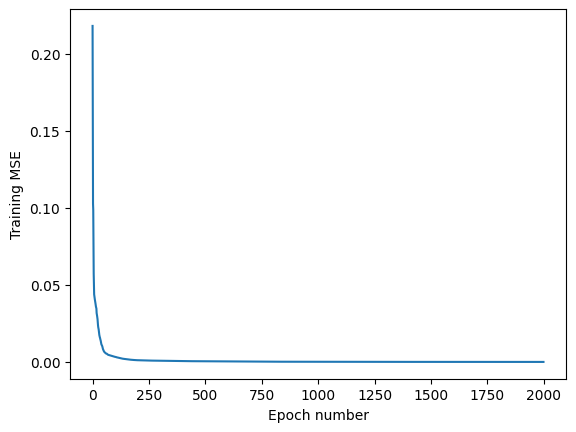

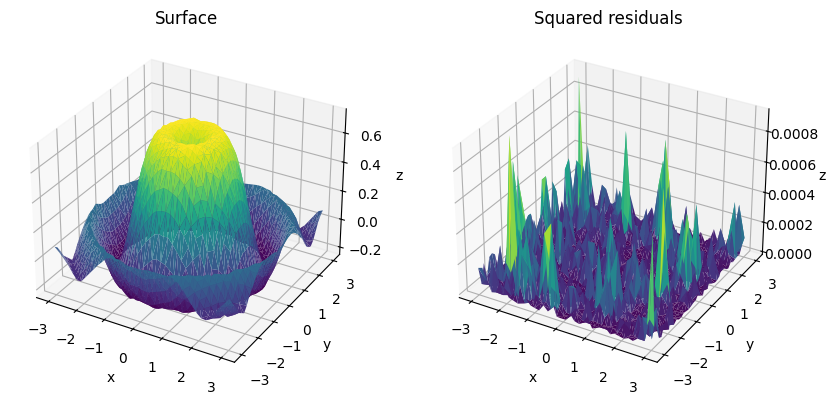

Training error: 6.13607480772771e-05
Test error: 6.13607480772771e-05


In [5]:
net = Net3L(50, 50)
loss_list = net.fit(x_train, y_train, torch.optim.LBFGS(net.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe'), 1600, 2000)

plt.figure()
plt.xlabel('Epoch number')
plt.ylabel('Training MSE')
plt.plot(loss_list)
plt.show()

y_pred = net(x_train).detach().squeeze(-1)

fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})
#
ax[0].plot_trisurf(x_train[:, 0], x_train[:, 1], y_pred, vmin=y_train.min(), cmap=cm.viridis)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('z')
ax[0].set_title('Surface')
#
ax[1].plot_trisurf(x_train[:, 0], x_train[:, 1], (y_pred-y_train)**2, vmin=0, cmap=cm.viridis)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('z')
ax[1].set_title('Squared residuals')
plt.show()

print('Training error:', net.evaluate(x_train, y_train))
print('Test error:', net.evaluate(x_train, y_test))

In [7]:
# Example with a list of optimizers (running this cell takes ~5min with the default parameters)
net = Net3L(50, 50)
# We create copies of this net so that every optimizer starts with the same initialization.
net_list = [copy.deepcopy(net) for i in range(5)]
# The number of epochs and other hyperparameters can (and should) be adapted to the point you're trying to make.
n_epochs = 2500
optim1 = torch.optim.SGD(params=net_list[0].parameters(), lr=0.05)
optim2 = torch.optim.SGD(params=net_list[1].parameters(), lr=0.1)
optim3 = torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True)
optim4 = torch.optim.Adam(params=net_list[3].parameters())
optim5 = torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')

optimizer_list = [optim1, optim2, optim3, optim4, optim5]
batch_sizes_list = [1600, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []
eval_list = []

for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)
    eval_list.append(net_list[i].evaluate(x_train, y_test))


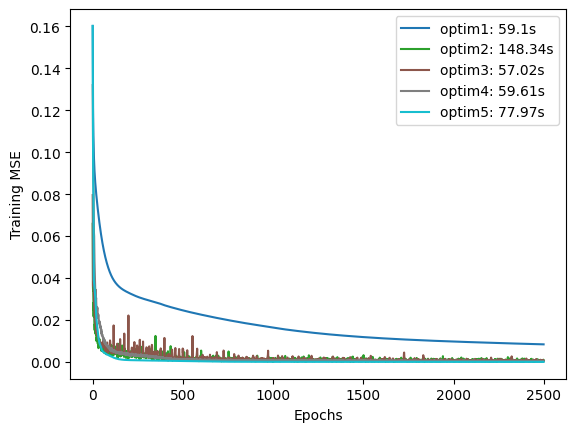

Training times: ['optim1: 59.10s', 'optim2: 148.34s', 'optim3: 57.02s', 'optim4: 59.61s', 'optim5: 77.97s']
Evaluation performances: ['optim1: 8.406e-03', 'optim2: 7.005e-04', 'optim3: 5.197e-04', 'optim4: 4.144e-04', 'optim5: 3.286e-05']


In [14]:
colors = cm.tab10(torch.linspace(0, 1, 5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
for i in range(5):
    plt.plot(loss_meta_list[i], color= colors[i])
plt.legend([f"optim{i+1}: {round(times_list[i], 2)}s" for i in range(5)])
plt.show()
print('Training times:', [f"optim{i+1}: {times_list[i]:.2f}s" for i in range(5)])
print('Evaluation performances:', [f"optim{i+1}: {eval_list[i]:1.3e}" for i in range(5)])

In [12]:
noise_levels = [0, 0.25, 0.33, 0.5]
optimizer_configs = [
    {'name': 'SGD_lr_0.05', 'optimizer': torch.optim.SGD, 'params': {'lr': 0.05}},
    {'name': 'SGD_lr_0.1', 'optimizer': torch.optim.SGD, 'params': {'lr': 0.1}},
    {'name': 'SGD_lr_0.1_momentum_0.9_nesterov', 'optimizer': torch.optim.SGD, 'params': {'lr': 0.1, 'momentum': 0.9, 'nesterov': True}},
    {'name': 'Adam', 'optimizer': torch.optim.Adam, 'params': {}},
    {'name': 'LBFGS', 'optimizer': torch.optim.LBFGS, 'params': {'lr': 1, 'max_iter': 1, 'line_search_fn': 'strong_wolfe'}}
]
batch_sizes_list = [1600, 40, 400, 400, 1600]
n_epochs = 1000

loss_data = {}

for noise_level in noise_levels:
    print(f"Training with noise level: {noise_level}")
    # Generate and prepare data for the current noise level
    z_noisy = z + noise_level * torch.randn(mesh_size, mesh_size)
    x_train_noisy = torch.vstack([x.ravel(), y.ravel()]).T
    y_train_noisy = z_noisy.ravel()

    loss_data[noise_level] = {}

    for i, optim_config in enumerate(optimizer_configs):
        # Create a fresh instance of the network for each training run
        net = Net3L(50, 50)
        # Instantiate optimizer with specific parameters
        current_optimizer = optim_config['optimizer'](params=net.parameters(), **optim_config['params'])

        print(f"  Training with optimizer: {optim_config['name']} and batch size: {batch_sizes_list[i]}")
        loss_list = net.fit(x_train_noisy, y_train_noisy, optimizer=current_optimizer, batch_size=batch_sizes_list[i], n_epochs_max=n_epochs)
        loss_data[noise_level][optim_config['name']] = loss_list

Training with noise level: 0
  Training with optimizer: SGD_lr_0.05 and batch size: 1600
  Training with optimizer: SGD_lr_0.1 and batch size: 40
  Training with optimizer: SGD_lr_0.1_momentum_0.9_nesterov and batch size: 400
  Training with optimizer: Adam and batch size: 400
  Training with optimizer: LBFGS and batch size: 1600
Training with noise level: 0.25
  Training with optimizer: SGD_lr_0.05 and batch size: 1600
  Training with optimizer: SGD_lr_0.1 and batch size: 40
  Training with optimizer: SGD_lr_0.1_momentum_0.9_nesterov and batch size: 400
  Training with optimizer: Adam and batch size: 400
  Training with optimizer: LBFGS and batch size: 1600
Training with noise level: 0.33
  Training with optimizer: SGD_lr_0.05 and batch size: 1600
  Training with optimizer: SGD_lr_0.1 and batch size: 40
  Training with optimizer: SGD_lr_0.1_momentum_0.9_nesterov and batch size: 400
  Training with optimizer: Adam and batch size: 400
  Training with optimizer: LBFGS and batch size: 160

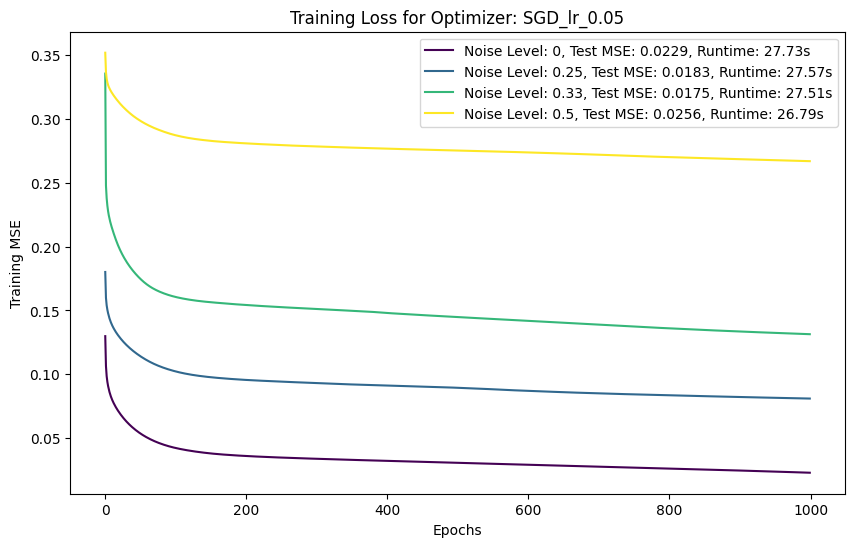

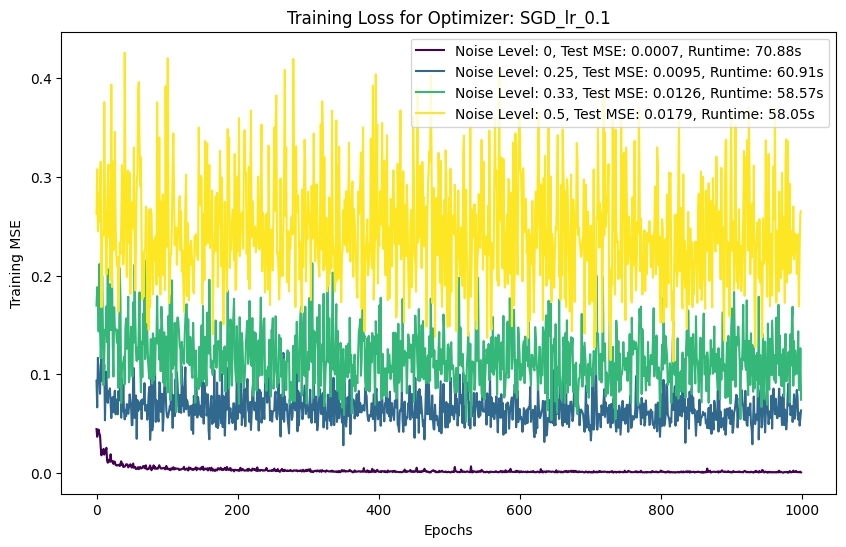

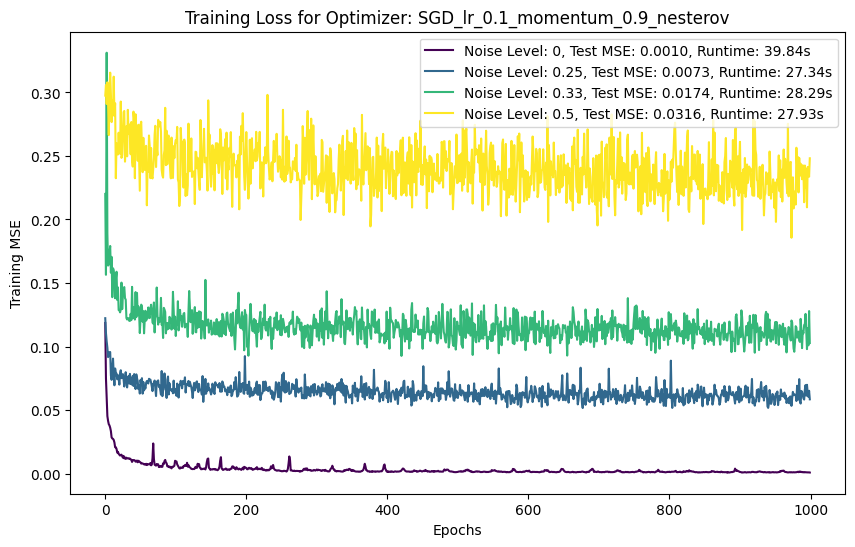

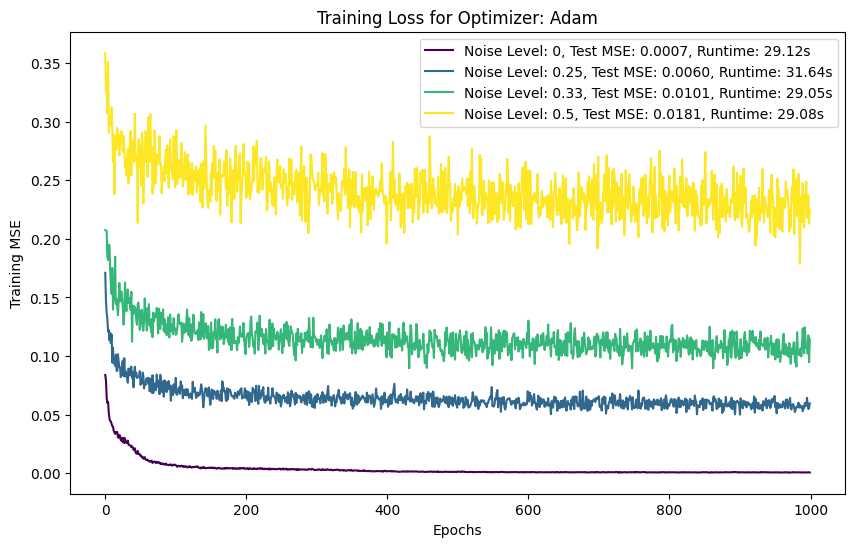

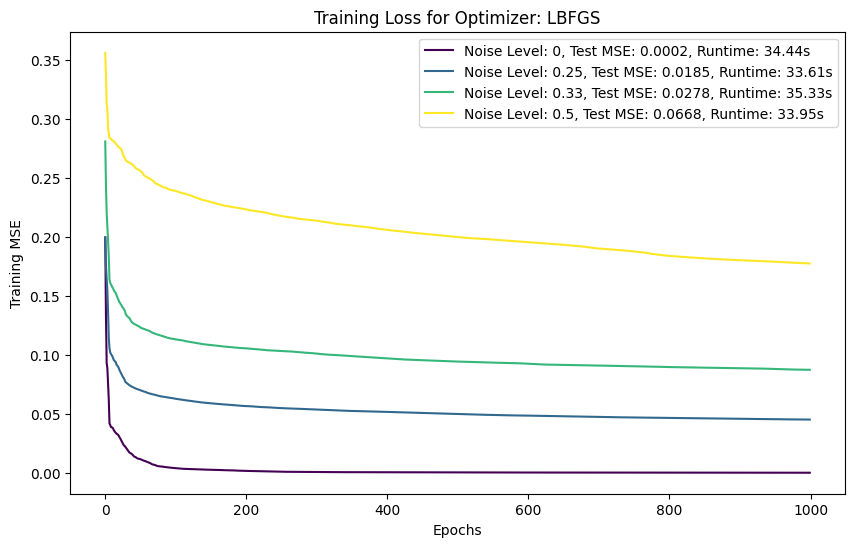

In [10]:
optimizer_names = list(loss_data[noise_levels[0]].keys()) # Get all optimizer names from the data
colors = cm.viridis(torch.linspace(0, 1, len(noise_levels))) # Use viridis colormap for noise levels

for optimizer_name in optimizer_names:
    plt.figure(figsize=(10, 6))
    plt.xlabel('Epochs')
    plt.ylabel('Training MSE')
    plt.title(f'Training Loss for Optimizer: {optimizer_name}')
    for i, noise_level in enumerate(noise_levels):
        if optimizer_name in loss_data[noise_level]: # Check if optimizer data exists for this noise level
             test_mse = loss_data[noise_level][optimizer_name]['test_mse']
             training_time = loss_data[noise_level][optimizer_name]['training_time']
             plt.plot(loss_data[noise_level][optimizer_name]['loss_history'], color=colors[i], label=f'Noise Level: {noise_level}, Test MSE: {test_mse:.4f}, Runtime: {training_time:.2f}s')
    plt.legend()
    plt.show()

In [ ]:
def run_optimizer_for_different_sizes(optimizer_index, noise=0.15, n_epochs=1000):
    mesh_size = 40
    t = torch.linspace(-3, 3, mesh_size)
    x, y = torch.meshgrid(t, t, indexing='ij')

    loss_lists = []
    times = []
    test_mses = []

    network_sizes = [10, 50, 100, 200]
    for neurons in network_sizes:
        z = f(x, y)
        z_noisy = z + noise * torch.randn(mesh_size, mesh_size)
        x_train = torch.vstack([x.ravel(), y.ravel()]).T
        y_train = z_noisy.ravel()
        y_test = z.ravel()

        net = Net3L(neurons, neurons)

        if optimizer_index == 0:
            optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
            batch_size = 1600
        elif optimizer_index == 1:
            optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
            batch_size = 40
        elif optimizer_index == 2:
            optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9, nesterov=True)
            batch_size = 400
        elif optimizer_index == 3:
            optimizer = torch.optim.Adam(net.parameters())
            batch_size = 400
        elif optimizer_index == 4:
            optimizer = torch.optim.LBFGS(net.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')
            batch_size = 1600

        start = time.time()
        loss_list = net.fit(x_train, y_train, optimizer, batch_size, n_epochs)
        end = time.time()

        test_mse = net.evaluate(x_train, y_test)
        run_time = end - start

        loss_lists.append(loss_list)
        times.append(run_time)
        test_mses.append(test_mse)

    return loss_lists, times, test_mses


In [ ]:
import pandas as pd

df_results = pd.DataFrame(columns=['Optimizer', 'Network Size', 'Final Training Loss', 'Test MSE', 'Run Time (s)'])

optimizer_names = ['SGD lr=0.05', 'SGD lr=0.1', 'SGD+Momentum', 'Adam', 'LBFGS']
network_sizes = [10, 50, 100, 200]
noise = 0.15  # fixed noise level

for i, opt_name in enumerate(optimizer_names):
    print(f"Running optimizer {opt_name}...")
    loss_lists, times, test_mses = run_optimizer_for_different_sizes(i, noise=noise, n_epochs=1000)

    for j, neurons in enumerate(network_sizes):
        final_loss = loss_lists[j][-1] if loss_lists[j] else float('nan')
        df_results.loc[len(df_results)] = {
            'Optimizer': opt_name,
            'Network Size': neurons,
            'Final Training Loss': final_loss,
            'Test MSE': test_mses[j],
            'Run Time (s)': times[j]
        }

df_results


## Towards a bigger model

We now switch to a bigger model, used to perform classification over the MNIST dataset. This example is widely known in the machine learning community, and we follow the code in the footsteps of François Chollet, the creator of the <tt>keras</tt> library (https://keras.io/examples/vision/mnist_convnet/).

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)


The following cell deals with the training of the model. Can you change the optimizer while still retaining the capabilities of the model trained with adam ?

In [ ]:
batch_size = 128
epochs = 15

# Modify the optimizer here
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.7620 - loss: 0.7657 - val_accuracy: 0.9768 - val_loss: 0.0839
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9612 - loss: 0.1254 - val_accuracy: 0.9835 - val_loss: 0.0580
Epoch 3/15
316/422 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9718 - loss: 0.0898

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.024249184876680374
Test accuracy: 0.9922999739646912


# A personal regression example


For this exercise, you will work on a dataset that is built from your personal student number as indicated in the assignment. If you have trouble with loading the data, place the data.csv file in your working directory.

In [19]:
try:
  data = pd.read_csv("data.csv", header= None).values.T
  print("Succesfully loaded data")
except:
  try:
    data_url = "https://github.com/KULasagna/ANN_DL_public/blob/master/session1/data.csv?raw=true"
    data = pd.read_csv(data_url, header= None).values.T
    print("Succesfully loaded data")
  except:
    print(f"Please download the data.csv file from Toledo and place it in your working directory: {os.getcwd()}")

Succesfully loaded data


In [20]:
def dataset_generation(d1, d2, d3, d4, d5):
    T_new = (d1 * data[:, 2] + d2 * data[:, 3] + d3 * data[:, 4] + d4 * data[:, 5] + d5 * data[:, 6])/(d1 + d2 + d3 + d4 + d5)
    return T_new

x_values = data[:, 0:2]

# Put your own (decreasingly ordered) student number in the function
# e.g. u1024659 --> T_new =  dataset_generation(9, 6, 5, 4, 2)

T_new =  dataset_generation(1, 1, 1, 1, 1)

# Random subsampling to get the working dataset
idx = np.random.permutation(13600)

# training set
x_train = x_values[idx[0:2000]]
y_train = T_new[idx[0:2000]]

# test set
x_test = x_values[idx[2000:3000]]
y_test = T_new[idx[2000:3000]]


print('Number of training datapoints:', x_train.shape[0])
print('Number of testing datapoints:', x_test.shape[0])

Number of training datapoints: 2000
Number of testing datapoints: 1000


You can now plot the surface of the dataset. (Hint: use the function <tt> plot_trisurf </tt>)

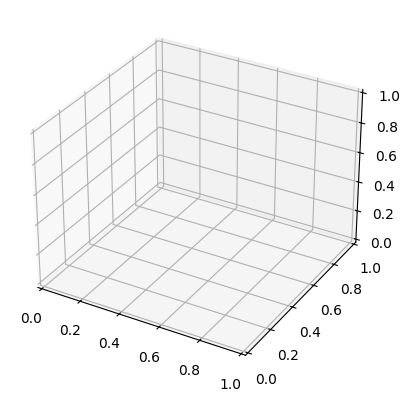

In [21]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
# TODO
plt.show()


In the following, we give an example of how to train a model. When you train yours, do not forget to validate it ! Hint: it is not enough to look at the training error. The hyperparameter values have voluntarily be set to give suboptimal results, you can do better than the proposed architecture !

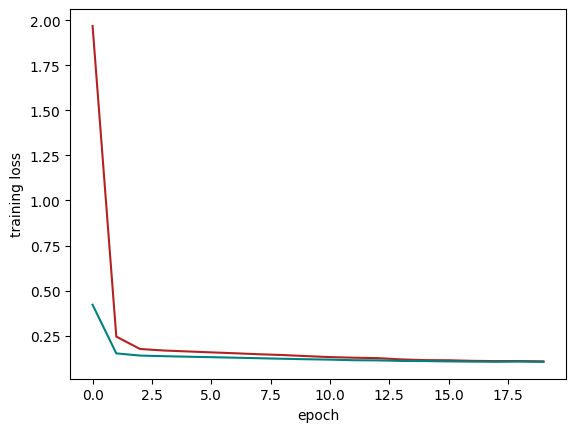

Last training error: 0.10696952044963837
Last validation error: 0.10366785526275635


In [22]:
net = keras.Sequential(
        [
            keras.layers.Input(shape= [x_train.shape[1]]),
            keras.layers.Dense(units= 3, activation='tanh'),
            keras.layers.Dense(units= 1)
        ]
    )

net.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate= 0.05)
)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = net.fit(x_train, y_train, validation_split= 0.2, epochs= 20, batch_size= 64, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history.history['loss'], color= "firebrick")
plt.plot(history.history['val_loss'], color= 'teal')
plt.show()
print('Last training error:', history.history['loss'][-1])
print('Last validation error:', history.history['val_loss'][-1])

Once a model is trained, you can use it to assess the final performance of the model on the test set.

In [23]:
y_pred = net.predict(x_test).squeeze(-1)
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step      
Final test error: 0.04808798445338121
